# Régression linéaire multiple

## 1) Implémentation du modèle de régression multiple

In [1]:
import pandas as pd
from matplotlib import pyplot as pp
import numpy as np

In [200]:
df = pd.read_csv("./data/boston_house_prices.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [41]:
#On peut jeter un oeil aux corrélations de pearson pour trouver des variables peu utiles.
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


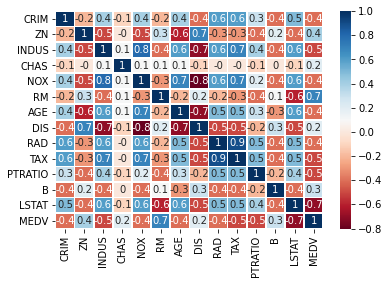

In [184]:
#On peut aussi utiliser seaborn pour mieux visualiser les fortes corrélations de pearson
#liant nos variables candidates à la cible pour aiguiller notre choix :
import seaborn as sb

corr = df.corr().round(1)

sb.heatmap(corr,
xticklabels = corr.columns,
yticklabels = corr.columns,
cmap='RdBu',
annot = True,
linewidth=0.7)

## Méthode normale

In [264]:
#Création des features et de la target :
X, Y = creer_X_et_y(features = ["RM", "LSTAT"], dataframe = df, target = "MEDV")

In [256]:

#Ajout du biais :
X = ajout_biais (X, y)

#Initialisation d'un theta aléatoire :
theta = creer_theta(X)

#Création d'une fonction coût :
cout = fonc_cout(X, y, theta)
print("Fonction coût avant apprentissage :",cout)

#Apprentissage automatique : création d'un theta2 optimisé et d'un array d'évolution de la fonction coût
theta, cout_evolution1 = desc_grad(X, y, theta, alpha = 0.001, nb_iter = 2000)

#Nouveau test d'une fonction coût :
cout = fonc_cout(X, y, theta)
print("Fonction coût après apprentissage :",cout)

#Prédiction d'un y à l'aide du modèle entraîné :
y_modele1 =  modele(X, theta)

#Calcul du coefficient de détermination R2 :
R2 = coef_R2(y, y_modele)
print("R2 =",R2)

Fonction coût avant apprentissage : 287.5079017404054
Fonction coût après apprentissage : 15.264954466252764
R2 = 0.15078046904975717


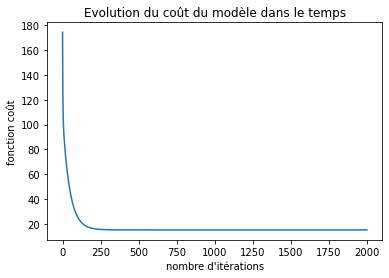

In [236]:
graphique_cout(cout_evolution1)

## Méthode scikitlearn

In [265]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, Y)
lin_reg.coef_

#Prédictions avec la méthode scikit learn :
y_modele2 = lin_reg.predict(X)

(506, 1)

## 2) Evaluation du modèle
Évaluez les résultats obtenus en utilisant la fonction mean_squared_error de sklearn

Modèle 1 (méthode normale):

In [266]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_modele1)

30.52990893250553

Modèle 2 (méthode scikitlearn):

In [267]:
mean_squared_error(y, y_modele2)

30.512468777299468

**Conclusion :** sur ce dataset, notre modèle donne des résultats analogues à celui de scikitlearn.

## Fonctions

In [268]:
import pandas as pd
import numpy as np

def creer_X_et_y (dataframe, features, target):
    '''Cette fonction prend un dataframe, une liste de colonnes pandas pour les features et
    une colonne pandas pour la target. Il retourne des ndarray correspondant à la ou les features
    X ainsi qu'un ndarray pour la cible Y.'''
    
    #Création d'une liste qui recueillera des ndarrays pour chaque variable x, créés avec les colonnes pandas :
    liste_features = []
    
    #On itère sur la liste issue du curselection de l'utilisateur dans la listbox de features possibles :
    for entete in features:
        liste_features.append(np.array(dataframe[entete]).reshape(-1,1))
    
    #On crée la première colonne de feature :
    X = liste_features[0]
    #On ajoute et concatène les éventuelles colonnes suplémentaires en sautant la première :
    for i in range(1, len(liste_features)):
        X = np.concatenate((liste_features[i],X), axis = 1)
    
    #Création de la target :
    y = np.array(dataframe[target]).reshape(-1,1)
    
    return X, y


def ajout_biais (X, y):
    '''Cette fonction sert à rajouter une colonne de biais (remplie de 1) à une matrice de features existante.'''
    #Création de la colonne de biais :
    biais = np.ones_like(y)
    
    #Concaténation du tout en un tableau de features X :
    X = np.concatenate((X,biais), axis = 1)
    return X

def creer_theta (features):
    '''Cette fonction crée un theta aléatoire pour initialiser les paramètres d'un modèle d'apprentissage.
    Pour avoir un theta de la bonne taille, il faut renseigner son array de feature en argument.'''
    theta = np.random.randn(X.shape[1],1)
    return theta

def fonc_cout (X, y, theta):
    '''Cette fonction renvoie une fonction coût pour une association target-feature-theta donnée.'''
    m = len(y)
    return 1/(2*m) * np.sum(((X.dot(theta)) - y )**2)

def grad (X, y, theta):
    '''Cette fonction retourne un gradient calculé à partir de feature(s) X, d'une cible y et d'un
    vecteur paramètre theta.'''
    m = len(y)
    return 1/m * X.T.dot(modele(X, theta) - y)

def desc_grad (X, y, theta, alpha, nb_iter) :
    '''Cette fonction réalise l'algorithme de descente de gradient et retourne un theta optimisé
    en conséquence ainsi qu'un array numpy contenant les valeurs successives de la fonction coût
    durant l'apprentissage (pour visualisation éventuelle).'''
    evolution_cout = np.zeros(nb_iter)

    for i in range(0, nb_iter):
        theta = theta - alpha*grad(X, y, theta)
        evolution_cout[i] = fonc_cout(X,y,theta)

    return theta, evolution_cout

def modele (X, theta):
    '''Cette fonction retourne un vecteur colonne y prédit à partir d'une ou plusieurs feature(s)
    X et d'un theta.'''
    y_modele = np.dot(X,theta)
    return y_modele

def ajout_feature_poly (x, degre):
    '''Cette fonction modifie un array de feature pour lui ajouter des features polynomiales du degré spécifié.
    Le biais doit être rajouté APRES l'ajout de features polynomiales.'''
    if degre >= 2:
        for d in range(2,degre+1):
            feat_pol = x**d
            x = np.concatenate((feat_pol, x),axis = 1)
    print("le x est ", x, x.shape)
    return x

def coef_R2 (y, y_modele):
    coef_r2 = 1-((y-y_modele)**2).sum()/((y-y.mean())**2).sum()
    return coef_r2

def graphique_cout (evolution_cout):
    '''Cette fonction prend en argument une liste contenant le coût à chaque itération du modèle.
    Elle renvoie un graphique '''
    pp.plot(range(len(evolution_cout.reshape(-1,1))), evolution_cout.reshape(-1,1))
    pp.xlabel("nombre d'itérations")
    pp.ylabel("fonction coût")
    pp.title("Evolution du coût du modèle dans le temps")